## Building a network in NeuroMLlite for BindsNET

### Create a network using NeuroMLlite

See https://docs.neuroml.org/Userdocs/Software/NeuroMLlite.html

In [1]:
import neuromllite as nmllite


# Set up the network 
net = nmllite.Network(id='TestNet')

net.parameters = {'n_neurons': 10,
                  'input_freq':       50} 

# Add a NeuroMLlite cell, using the above file
input_cell = nmllite.Cell(id='Input', 
                            bindsnet_node='Input', 
                            parameters={})

net.cells.append(input_cell)

lif_cell = nmllite.Cell(id='LIF', 
                            bindsnet_node='LIFNodes', 
                            parameters={})

net.cells.append(lif_cell)


# Create a region in 3D space (not really necessary for 1 cell, but useful if more added later)
r1 = nmllite.RectangularRegion(id='region1', x=0,y=0,z=0,width=1000,height=100,depth=1000)
net.regions.append(r1)


# Create a population of n_neurons cells
pX = nmllite.Population(id='X', 
                        size='n_neurons', 
                        component=input_cell.id, 
                        properties={'color':'0.8 0 0'},
                        random_layout = nmllite.RandomLayout(region=r1.id))

net.populations.append(pX)

pY = nmllite.Population(id='Y', 
                        size='n_neurons', 
                        component=lif_cell.id, 
                        properties={'color':'0 0.8 0'},
                        random_layout = nmllite.RandomLayout(region=r1.id))

net.populations.append(pY)



# Print a summary of the network info
print(net)


# Save the NeuroMLlite network to a JSON file
new_file = net.to_json_file('%s.json'%net.id)


# Specify a NeuroMLlite simulation and save to file
sim = nmllite.Simulation(id='Sim%s'%net.id,
                 network=new_file,
                 duration='1000',
                 dt='0.025',
                 recordTraces={'all':'*'})
                 
sim.to_json_file()

Network (TestNet), version = NeuroMLlite v0.3.5, parameters = {'n_neurons': 10, 'input_freq': 50}
  cells:
    Cell (Input), bindsnet_node = Input, parameters = {}
    Cell (LIF), bindsnet_node = LIFNodes, parameters = {}
  regions:
    RectangularRegion (region1), x = 0.0, y = 0.0, z = 0.0, width = 1000.0, height = 100.0, depth = 1000.0
  populations:
    Population (X), size = n_neurons, component = Input, properties = {'color': '0.8 0 0'}, random_layout = RandomLayout (None), region = region1
    Population (Y), size = n_neurons, component = LIF, properties = {'color': '0 0.8 0'}, random_layout = RandomLayout (None), region = region1
neuromllite >>> Written NeuroMLlite Network to: TestNet.json
neuromllite >>> Written NeuroMLlite Simulation to: SimTestNet.json


'SimTestNet.json'

In [2]:
!cat TestNet.json

{
    "TestNet": {
        "version": "NeuroMLlite v0.3.5",
        "parameters": {
            "n_neurons": 10,
            "input_freq": 50
        },
        "cells": {
            "Input": {
                "bindsnet_node": "Input",
                "parameters": {}
            },
            "LIF": {
                "bindsnet_node": "LIFNodes",
                "parameters": {}
            }
        },
        "regions": {
            "region1": {
                "x": 0.0,
                "y": 0.0,
                "z": 0.0,
                "width": 1000.0,
                "height": 100.0,
                "depth": 1000.0
            }
        },
        "populations": {
            "X": {
                "size": "n_neurons",
                "component": "Input",
                "properties": {
                    "color": "0.8 0 0"
                },
                "random_layout": {
                    "region": "region1"
                }
            },
            "Y": {
        

### Generate the network and run it in BindsNET

In [3]:
from neuromllite.NetworkGenerator import generate_and_run
traces, events = generate_and_run(sim, 
                                  simulator='BindsNET', 
                                  return_results =True)

neuromllite >>> Loaded network specification from TestNet.json
neuromllite >>> Generating network TestNet and running in simulator: BindsNET...

   ********************************************************
   *** Warning: Support for BindsNET is very preliminary!! ***
   ********************************************************

neuromllite >>> Initiating BindsNET...
neuromllite >>> Starting net generation for TestNet...
neuromllite >>> Document: TestNet
neuromllite >>> Network: TestNet
neuromllite >>> Population: X, component: Input, size: 10 cells
neuromllite >>> Population: Y, component: LIF, size: 10 cells
neuromllite >>> Building network with: {'X': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}, 'Y': {0: 10, 1: 11, 2: 12, 3: 13, 4: 14, 5: 15, 6: 16, 7: 17, 8: 18, 9: 19}}
neuromllite >>> Weights: {}
neuromllite >>> Delays: {}
Creating a population X with 10 instances of Cell (Input), bindsnet_node = Input, parameters = {} using: <X = bindsnet.network.nodes.Input(10)>
C

### Plot the results

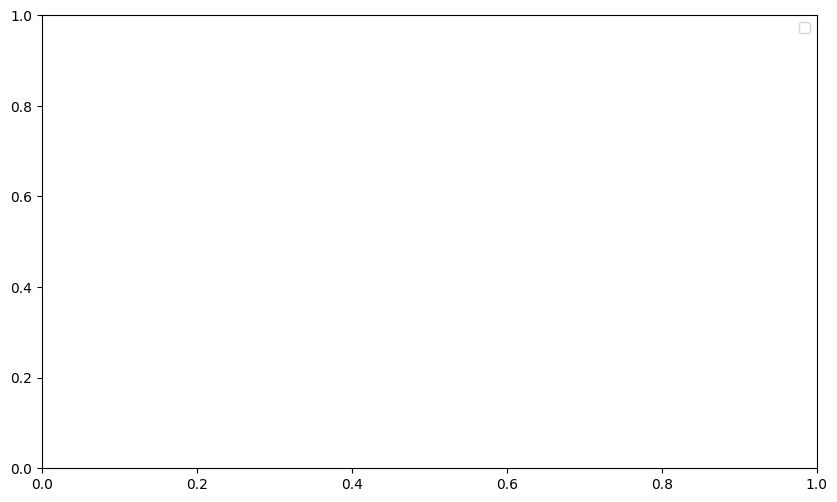

In [4]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,6), dpi= 100)
for trace in traces:
    if trace is not 't':
        plt.plot(traces['t'],traces[trace],label=trace)
plt.legend()